The objective of this project is to predict whether a passenger survived the Titanic disaster based on features such as passenger class, sex, age, fare, and number of family members aboard. 

This classification task can simulate real-world applications where decision-making depends on multiple human and environmental factors. Understanding the key contributors to survival can help in:

- Designing better evacuation protocols.
- Informing safety feature designs for transport.
- Educating about the impact of social and demographic variables in emergency scenarios.

The model uses the Random Forest algorithm to classify passengers as survivors or non-survivors based on historical data.

Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Read the dataset 

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

Check top 5 records 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df = df.dropna()

Remove rows with any null values

In [10]:
df = df.dropna(axis=1)

Remove columns with Null Values

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

There are no Null values 

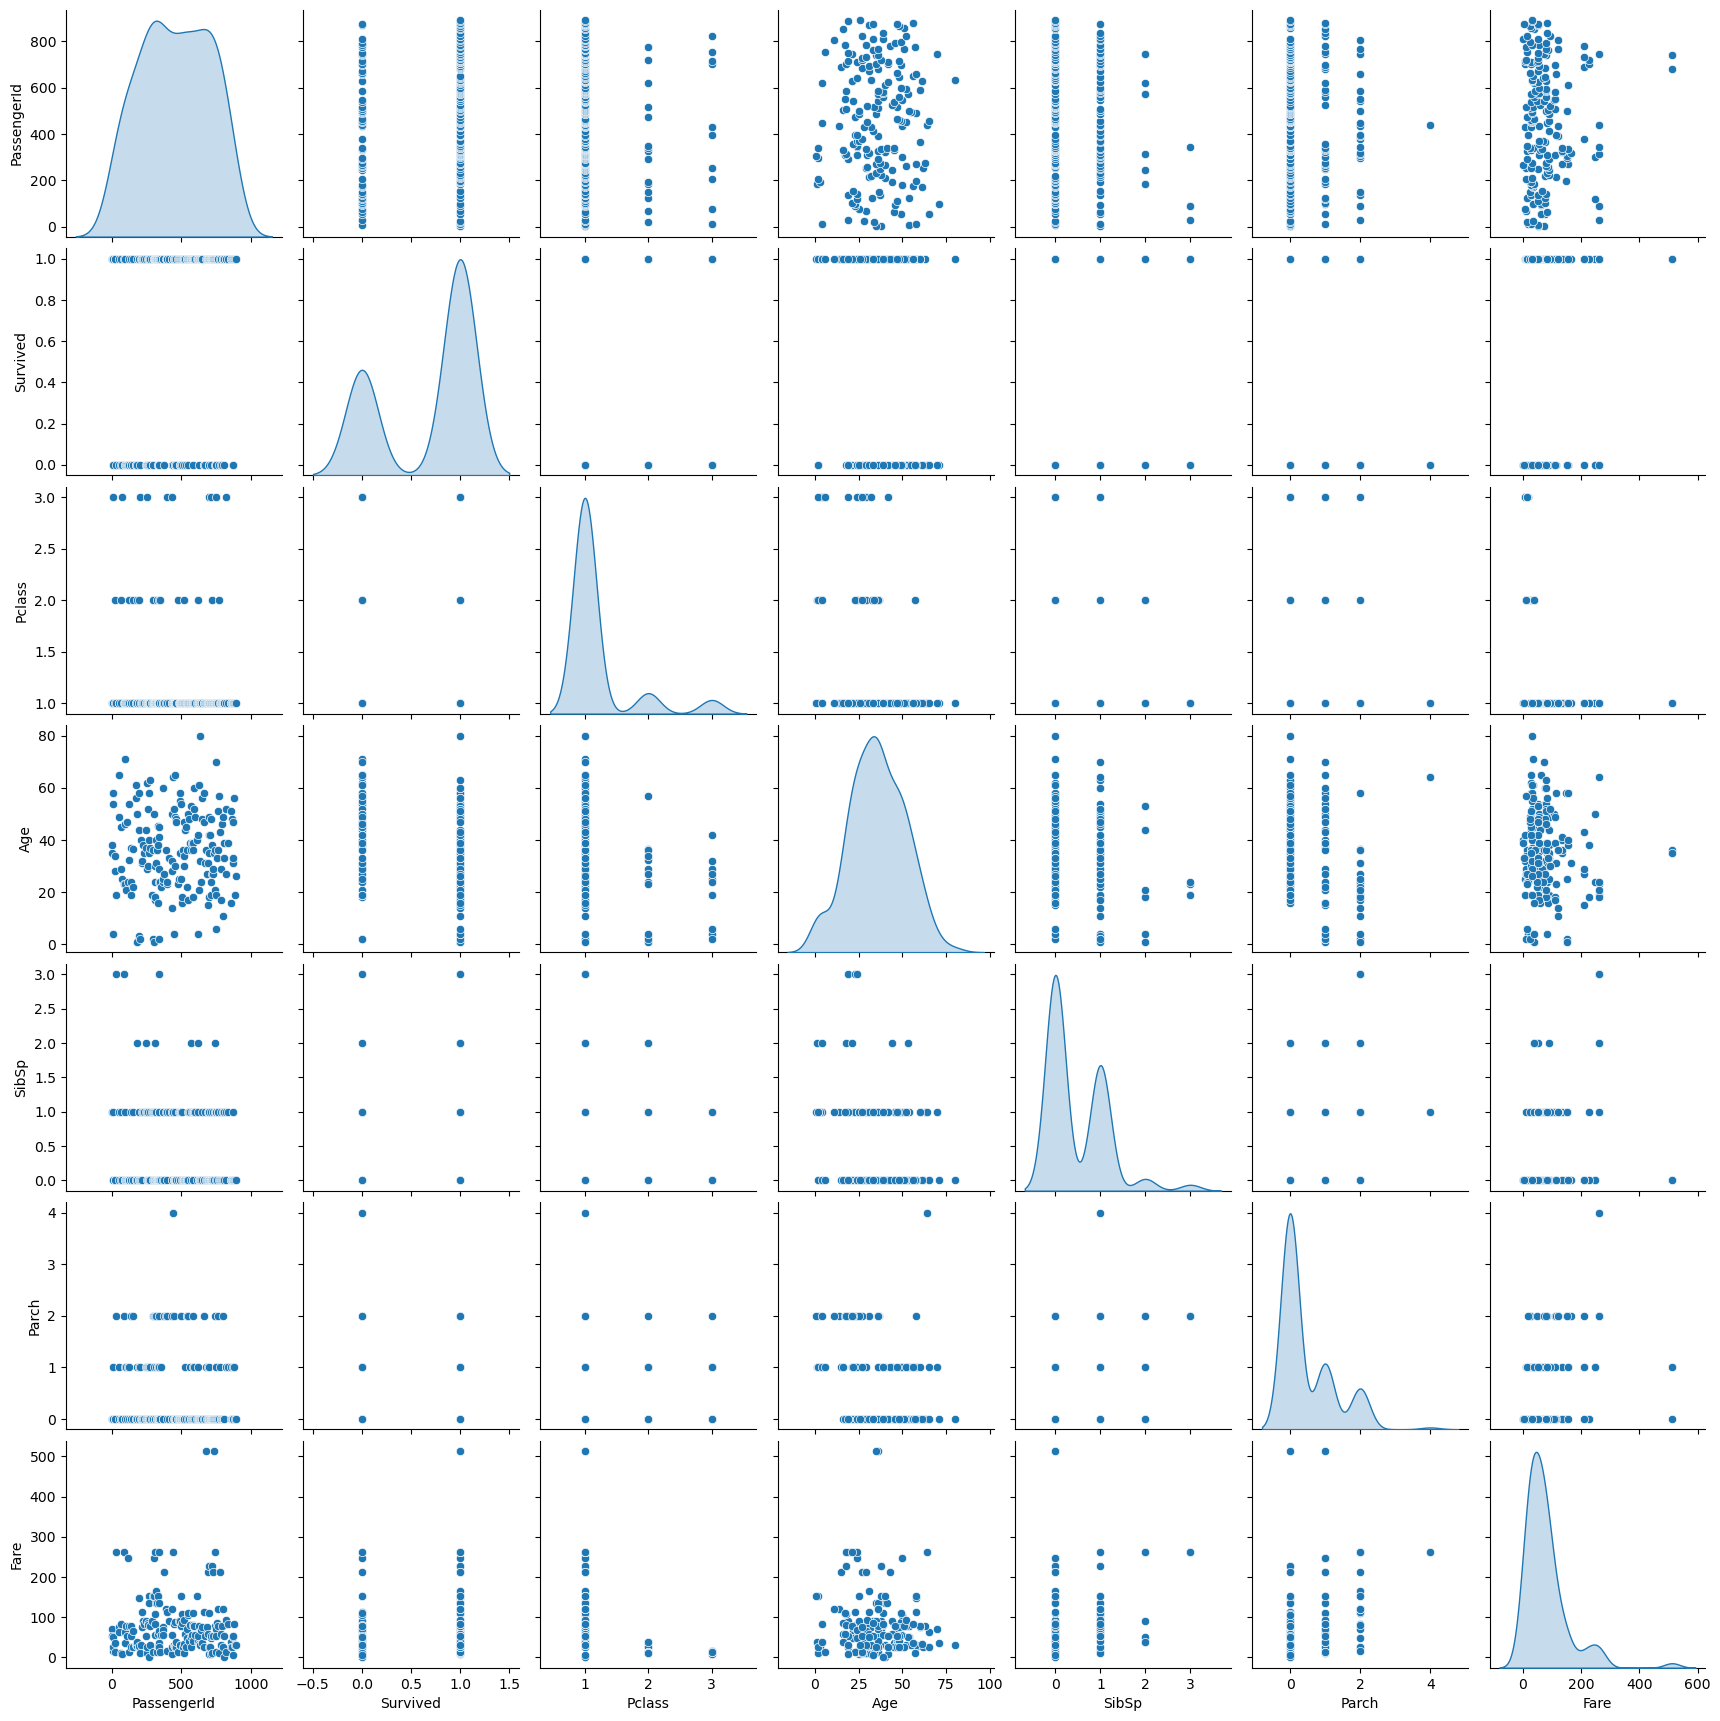

In [32]:
sns.pairplot(df,diag_kind = 'kde')

# Observation

Pclass: Passengers in 1st class had a higher survival rate compared to those in 2nd and 3rd class.

There is a clear separation in survival across classes.

Age Distribution: Age follows a right-skewed distribution (most passengers are young adults).

There is a wide age range, with children and elderly included.

Fare Distribution: Highly right-skewed; most fares are low with some outliers above 500.

Survival and SibSp/Parch: People with some family (1-2 relatives) seem to have slightly higher survival rates than those alone or with large families.


# Features and target variable

In [12]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# Encode 'Sex' column

In [14]:
X.loc[:,'Sex']= X['Sex'].map({'female':0,'male':1})

# Fill missing Age variable with the median

In [15]:
X.loc[:,'Age'].fillna(X['Age'].median(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8200\1601462916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.loc[:,'Age'].fillna(X['Age'].median(),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_8200\1601462916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'Age'].fillna(X['Age'].median(),inplace=True)


# Split data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=2, random_state=0) 

# Initialize RandomForestClassifier

In [25]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the training data

In [26]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# Make predictions

In [27]:
y_pred = classifier.predict(X_test)

# Calculate accuracy and classification report

In [28]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results

In [29]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Sample prediction

In [30]:
sample = X_test.iloc[0:1]
prediction = classifier.predict(sample)

# Retrieve and display the sample

In [31]:
sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")


Sample Passenger: {'Pclass': 2, 'Sex': 0, 'Age': 23.0, 'SibSp': 0, 'Parch': 0, 'Fare': 13.7917}
Predicted Survival: Survived
